In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def shuffle_together(*arrays):
    for arr in arrays:
        assert len(arr) == len(arrays[0]), "list-likes not all same length"
        
    arrays = np.array(arrays).T
    
    np.random.shuffle(arrays)
    
    return arrays.T
        

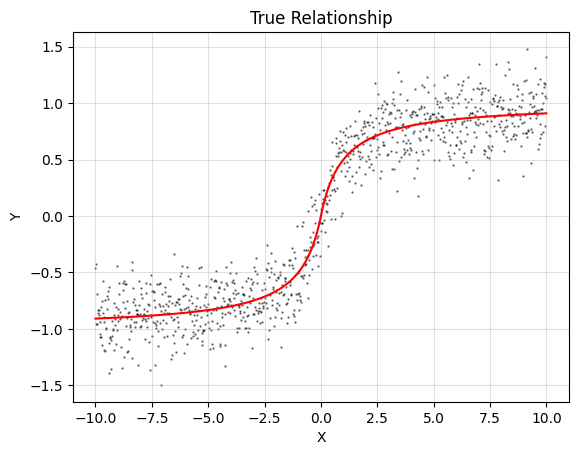

In [10]:
x = np.linspace(-10,10, 1000)
y_true = x/(1 + abs(x)) 
plt.plot(x, y_true, color = 'red')
y = y_true + np.random.normal(0,.2, size = len(x))
plt.scatter(x, y, s = .5, color = "black", alpha = .5)

plt.title("True Relationship")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(alpha = .4)
plt.show()

In [5]:
class lazy_tree:
    
    # prop_steps is the proportion of steps evaluated
    # prop_steps must be in (0,1] or None
    def __init__(self, prop_steps = None):
        
        assert (prop_steps == None) or ((prop_steps > 0) and (prop_steps <= 1)) , "prop_steps must be in (0,1]"
        
        self.prop_steps = prop_steps
        self.fitted = False
       
        
    def predict(self, x):
        assert self.fitted, "model has not been fit yet"

        if x > self.split_point:
            return self.pred_o
        else:
            return self.pred_u
        
    def fit(self, x, y):
        assert len(x) == len(y), "x and y different lengths"
        
        if self.prop_steps == None:
            step_size = max(1, int(len(x)/100))
            
        else:
            step_size = round(1/self.prop_steps)
            
        splits = (x[1::step_size] + x[:-1:step_size])/2

        
        min_mse = None
        min_mse_split_point = None
        
        for split_point in splits:
            
            y_temp = y[x < split_point]
            mse_1 = sum((y_temp - np.mean(y_temp))**2)
            
            y_temp = y[x >= split_point]
            mse_2 = sum((y_temp - np.mean(y_temp))**2)
            
            mse_tot = mse_1 + mse_2

            #print(split_point, mse_tot,"\n")
            
            
            if (min_mse == None) or (mse_tot < min_mse):
                
                min_mse = mse_tot
                self.split_point = split_point
                
        self.pred_u = np.mean(y[x < self.split_point])
        self.pred_o = np.mean(y[x >= self.split_point])
                
        
        self.fitted = True
        
        return self.split_point
                
        
        
        
        
            
        
    

In [6]:
tree = lazy_tree()
tree.fit(x,y)

0.020020020020020013

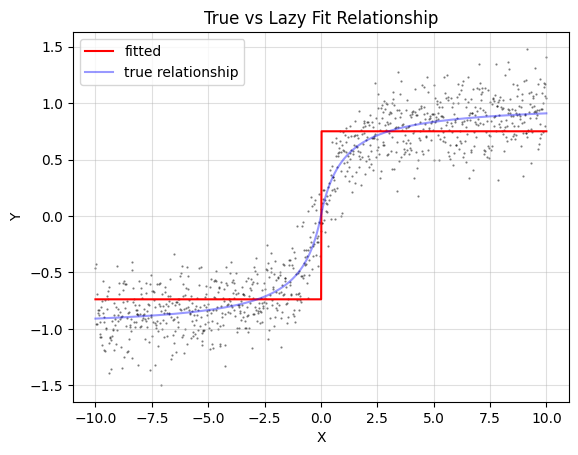

In [11]:


y_fitted = list(map(lambda x_val: tree.predict(x_val), x))

plt.scatter(x, y, 
            s = .3, color = "black", alpha = .5)
plt.plot(x,y_fitted, 
         color = "red", label = "fitted")
plt.plot(x, y_true, 
         color = "blue", alpha = .4, label = "true relationship")


plt.title("True vs Lazy Fit Relationship")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(alpha = .4)
plt.show()